## Import & Initialize

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('traffic_data_20240917_185639_204a2503-d8a2-4c14-aefe-0acf4a61cc14.csv')
df.tail()

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,Start_point,End_point
688,بيدة,8.496,18.300000,27.855738,-0.016667,Blue,2024-09-17T18:56:38.991851,"(24.6137046, 46.6878894)","(24.5886539, 46.6349367)"
689,عبداللطيف الخيمي,6.354,11.850000,32.172152,2.383333,Orange,2024-09-17T18:56:39.177215,"(24.6668921, 46.7040428)","(24.6644876, 46.6998152)"
690,الحويرة,10.444,16.383333,38.248627,0.000000,Blue,2024-09-17T18:56:39.346488,"(24.6860722, 46.8153462)","(24.6433178, 46.7776658)"
691,التوحيد,6.077,7.333333,49.720909,0.216667,Blue,2024-09-17T18:56:39.496316,"(24.5602792, 46.6204638)","(24.5516396, 46.609009)"
692,شارع الاسود بن ابي الاسود النهدي,13.867,21.833333,38.107786,1.016667,Blue,2024-09-17T18:56:39.861986,"(24.7586531, 46.8591989)","(24.717821, 46.8295219)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   road_name                693 non-null    object 
 1   distance_km              693 non-null    float64
 2   duration_in_traffic_min  693 non-null    float64
 3   speed_kmh                693 non-null    float64
 4   delay_min                693 non-null    float64
 5   traffic_condition        693 non-null    object 
 6   timestamp                693 non-null    object 
 7   Start_point              693 non-null    object 
 8   End_point                693 non-null    object 
dtypes: float64(4), object(5)
memory usage: 48.9+ KB


In [ ]:
df.isna().sum()

,0
road_name,0
distance_km,0
duration_in_traffic_min,0
speed_kmh,0
delay_min,0
traffic_condition,0
timestamp,0
Start_point,0
End_point,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Road Name       705 non-null    object 
 1   Distance (km)   705 non-null    float64
 2   Time (mins)     705 non-null    float64
 3   Ratio (km/min)  705 non-null    float64
 4   Start_point     705 non-null    object 
 5   End_point       705 non-null    object 
dtypes: float64(3), object(3)
memory usage: 33.2+ KB


In [ ]:
df = df[(df['Distance (km)'] <= 81) & (df['Distance (km)'] >= 7)]

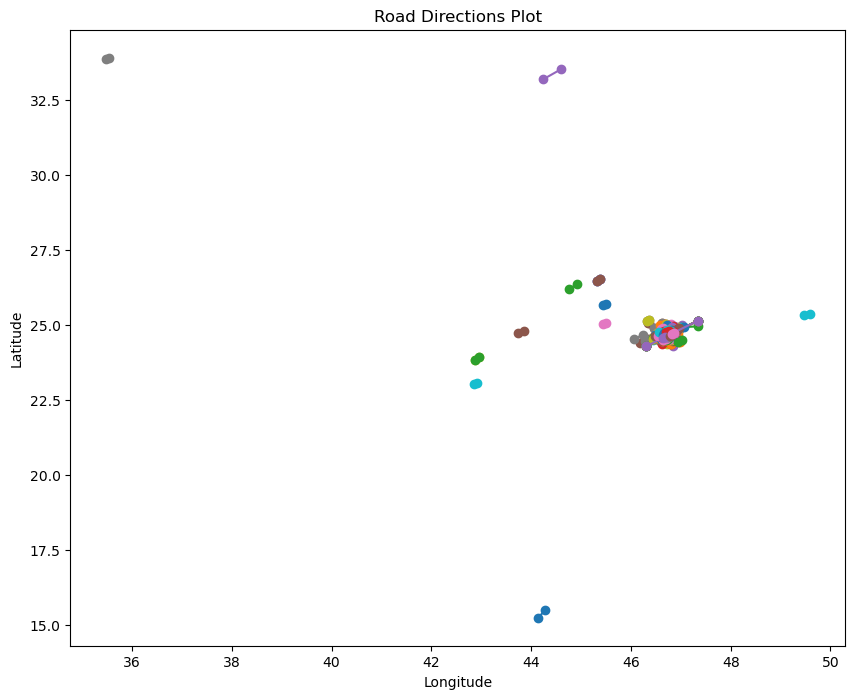

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

# Convert the string representation of tuples into actual tuples
df['Start_point'] = df['Start_point'].apply(ast.literal_eval)
df['End_point'] = df['End_point'].apply(ast.literal_eval)

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot polylines for each road
for index, row in df.iterrows():
    start_lat, start_lng = row['Start_point']
    end_lat, end_lng = row['End_point']

    # Plot each road line with its start and end points
    plt.plot([start_lng, end_lng], [start_lat, end_lat], marker='o', label=row['Road Name'])

# Adding labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Road Directions Plot")

# Display the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


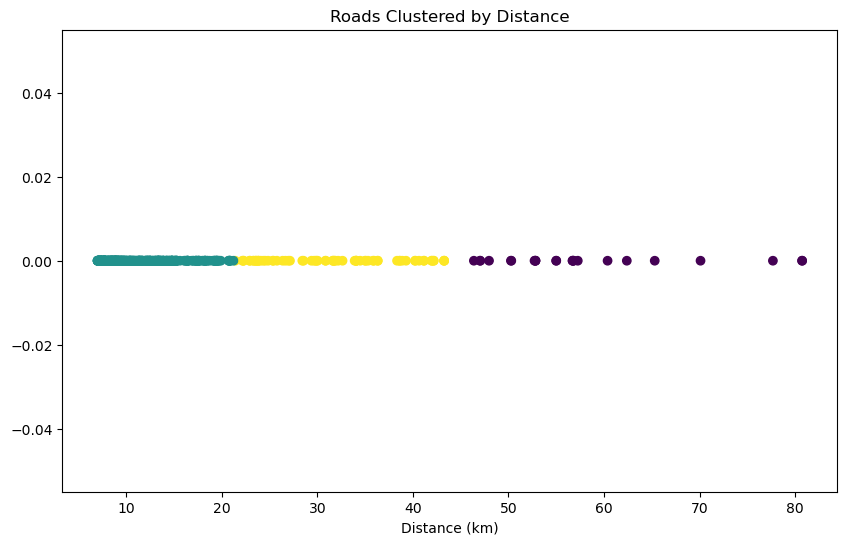

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = df[['Distance (km)']].values

kmeans = KMeans(n_clusters=3, random_state=0)

df['Distance_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['Distance (km)'], np.zeros_like(df['Distance (km)']),
            c=df['Distance_Cluster'], cmap='viridis', label=df['Road Name'])
plt.xlabel("Distance (km)")
plt.title("Roads Clustered by Distance")
plt.show()

In [ ]:
df['Start_lat'] = df['Start_point'].apply(lambda x: x[0])
df['Start_lng'] = df['Start_point'].apply(lambda x: x[1])
df['End_lat'] = df['End_point'].apply(lambda x: x[0])
df['End_lng'] = df['End_point'].apply(lambda x: x[1])

X_geo = np.vstack([
    df[['Start_lat', 'Start_lng']].values,
    df[['End_lat', 'End_lng']].values
])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


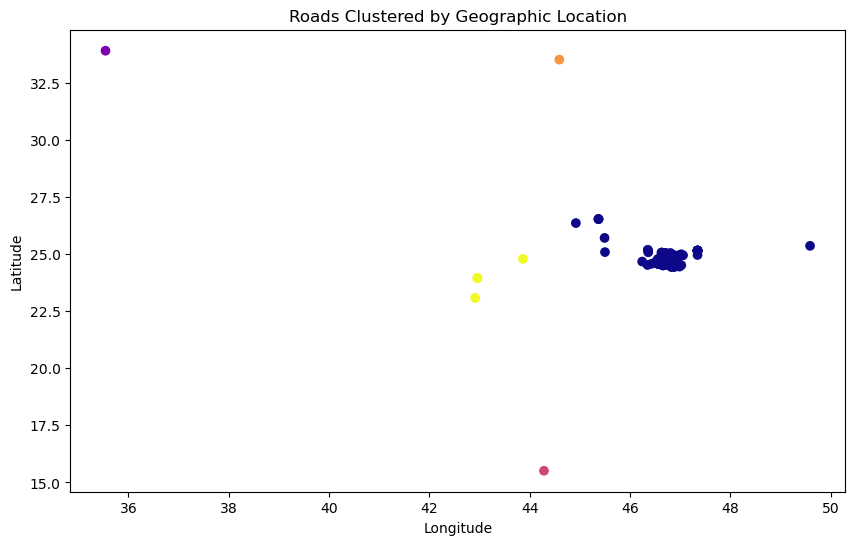

In [ ]:
geo_kmeans = KMeans(n_clusters=5, random_state=0)
df['Geo_Cluster'] = geo_kmeans.fit_predict(df[['Start_lat', 'Start_lng']].values)

plt.figure(figsize=(10, 6))
plt.scatter(df['Start_lng'], df['Start_lat'],
            c=df['Geo_Cluster'], cmap='plasma', label=df['Road Name'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Roads Clustered by Geographic Location")
plt.show()

In [ ]:
def calculate_bearing(start, end):
    start_lat, start_lng = np.radians(start)
    end_lat, end_lng = np.radians(end)
    d_lng = end_lng - start_lng
    x = np.sin(d_lng) * np.cos(end_lat)
    y = np.cos(start_lat) * np.sin(end_lat) - (np.sin(start_lat) * np.cos(end_lat) * np.cos(d_lng))
    bearing = np.degrees(np.arctan2(x, y))
    return (bearing + 360) % 360  # Normalize to 0-360 degrees

df['Bearing'] = df.apply(lambda row: calculate_bearing(row['Start_point'], row['End_point']), axis=1)

X_bearing = df[['Bearing']].values
bearing_kmeans = KMeans(n_clusters=3, random_state=0)
df['Bearing_Cluster'] = bearing_kmeans.fit_predict(X_bearing)

# Step 6: Further refine by eliminating roads without alternatives
# This is done by checking if roads within a cluster have similar bearings and are close in distance
# We'll assume here that roads without alternatives are those with no nearby roads in the same cluster

# Step 7: Final list of roads after filtering
final_road_list = df[df['Bearing_Cluster'].notnull()]  # Further refinement can be done here

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
final_road_list['Bearing_Cluster'].value_counts()

Bearing_Cluster
2    259
1    177
0    131
Name: count, dtype: int64

In [ ]:
# final_road_list

,Road Name,Distance (km),Time (mins),Ratio (km/min),Start_point,End_point,Distance_Cluster,Start_lat,Start_lng,End_lat,End_lng,Geo_Cluster,Bearing,Bearing_Cluster
3,القويعية,17.266,9.700000,1.780000,"(24.7586767, 46.70162699999999)","(24.7564578, 46.6969467)",1,24.758677,46.701627,24.756458,46.696947,0,242.432867,1
4,صلبوخ,36.323,25.416667,1.429102,"(24.5293006, 46.70255179999999)","(24.5263552, 46.7001172)",2,24.529301,46.702552,24.526355,46.700117,0,216.943178,2
5,اثيثية,26.970,19.866667,1.357550,"(24.6927378, 46.6672146)","(24.6903053, 46.6619341)",2,24.692738,46.667215,24.690305,46.661934,0,243.115485,1
7,أبي مروة,62.389,43.566667,1.432035,"(24.7210858, 46.8304302)","(24.718233, 46.8261919)",0,24.721086,46.830430,24.718233,46.826192,0,233.462368,1
8,Dammam Road,47.042,36.783333,1.278894,"(24.9568714, 47.0291162)","(24.7886798, 46.7188421)",0,24.956871,47.029116,24.788680,46.718842,0,239.207192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,السائب بن زيد,7.371,20.083333,0.367021,"(24.7469689, 46.8410273)","(24.706146, 46.8107557)",1,24.746969,46.841027,24.706146,46.810756,0,213.968440,2
698,ثمينة,9.220,15.916667,0.579267,"(24.8090501, 46.763115)","(24.772079, 46.71129089999999)",1,24.809050,46.763115,24.772079,46.711291,0,231.850211,2
699,بيدة,8.496,21.250000,0.399812,"(24.6137046, 46.6878894)","(24.5886539, 46.6349367)",1,24.613705,46.687889,24.588654,46.634937,0,242.522775,1
701,الحويرة,9.177,18.933333,0.484701,"(24.6860722, 46.8153462)","(24.6433178, 46.7776658)",1,24.686072,46.815346,24.643318,46.777666,0,218.699630,2


In [ ]:
df_end = final_road_list[(final_road_list['Distance_Cluster'] == 1) & (final_road_list['Geo_Cluster'] == 0)]

In [ ]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 3 to 704
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Road Name         467 non-null    object 
 1   Distance (km)     467 non-null    float64
 2   Time (mins)       467 non-null    float64
 3   Ratio (km/min)    467 non-null    float64
 4   Start_point       467 non-null    object 
 5   End_point         467 non-null    object 
 6   Distance_Cluster  467 non-null    int32  
 7   Start_lat         467 non-null    float64
 8   Start_lng         467 non-null    float64
 9   End_lat           467 non-null    float64
 10  End_lng           467 non-null    float64
 11  Geo_Cluster       467 non-null    int32  
 12  Bearing           467 non-null    float64
 13  Bearing_Cluster   467 non-null    int32  
dtypes: float64(8), int32(3), object(3)
memory usage: 49.3+ KB
